In [578]:
## ToDO: drop initial_list_status
# out_prncp
# out_prncp_inv
# total_pymnt
# total_pymnt_inv
# total_rec_prncp
# total_rec_int
# total_rec_late_fee
# recoveries
# collection_recovery_fee
# last_pymnt_d
# last_pymnt_amnt
# next_pymnt_d
# last_credit_pull_d
# collections_12_mths_ex_med
# policy_code
# application_type

In [495]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

% matplotlib inline

In [496]:
#Read the data set
loan_df= pd.read_csv('loan.csv', low_memory=False)
dictionaries_df = pd.read_excel('Data_Dictionary.xlsx')

In [497]:
dictionaries_df.columns

Index(['LoanStatNew', 'Description'], dtype='object')

In [498]:
def getColumnDescription(columnNames):
    temp = dictionaries_df[columnNames]

In [499]:
# Get the same of data set
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [500]:
#Check if any of the columns have total null rows
loan_df.isna().all()

id                                False
member_id                         False
loan_amnt                         False
funded_amnt                       False
funded_amnt_inv                   False
term                              False
int_rate                          False
installment                       False
grade                             False
sub_grade                         False
emp_title                         False
emp_length                        False
home_ownership                    False
annual_inc                        False
verification_status               False
issue_d                           False
loan_status                       False
pymnt_plan                        False
url                               False
desc                              False
purpose                           False
title                             False
zip_code                          False
addr_state                        False
dti                               False


In [501]:
# Get the number of rows that have all rows as null
loan_df.isna().all().sum()

54

In [502]:
# Drop the columns that that have all NaN rows
loan_df.dropna(axis=1, how='all', inplace=True)

In [503]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [504]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [505]:
loan_df.groupby(by='pymnt_plan').size()

pymnt_plan
n    39717
dtype: int64

In [506]:
#since all of them have payment plan set as 'n' we can remove this column altogether
loan_df.drop(columns='pymnt_plan', inplace=True)

##### First we need to understand which of the columns needs to be retained

In [507]:
# Drop irrelavant columns such as id, desc, url, title
# id = A unique LC assigned ID for the loan listing.
# desc = Loan description provided by the borrower
# url = URL for the LC page with listing data.

loan_df.drop(columns=['id', 'url', 'desc'], inplace=True)

In [508]:
# we will drop emp_title
loan_df.drop(columns='emp_title', inplace=True)

In [509]:
# We will drop the title
loan_df.drop(columns='title', inplace=True)

In [510]:
loan_df.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### Univariate Ananlysis

In [511]:
#Which year issued the most loans. Formats from http://strftime.org/
loan_df['loan_issue_year'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y').dt.year

In [512]:
loan_df['loan_issue_year']

0        2011
1        2011
2        2011
3        2011
4        2011
5        2011
6        2011
7        2011
8        2011
9        2011
10       2011
11       2011
12       2011
13       2011
14       2011
15       2011
16       2011
17       2011
18       2011
19       2011
20       2011
21       2011
22       2011
23       2011
24       2011
25       2011
26       2011
27       2011
28       2011
29       2011
         ... 
39687    2007
39688    2007
39689    2007
39690    2007
39691    2007
39692    2007
39693    2007
39694    2007
39695    2007
39696    2007
39697    2007
39698    2007
39699    2007
39700    2007
39701    2007
39702    2007
39703    2007
39704    2007
39705    2007
39706    2007
39707    2007
39708    2007
39709    2007
39710    2007
39711    2007
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: loan_issue_year, Length: 39717, dtype: int64

Text(0,0.5,'Loan Amount')

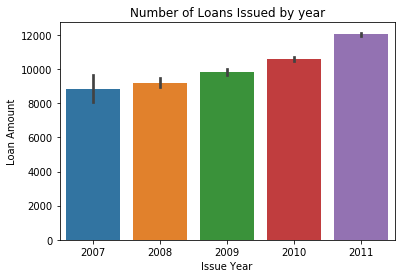

In [513]:
sns.barplot(x='loan_issue_year', y='loan_amnt', data=loan_df)
plt.title("Number of Loans Issued by year")
plt.xlabel("Issue Year")
plt.ylabel("Loan Amount")

> ##### The total number of loans issued were in the year 2011

In [514]:
loan_df.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'loan_issue_year'],
      dtype='object')

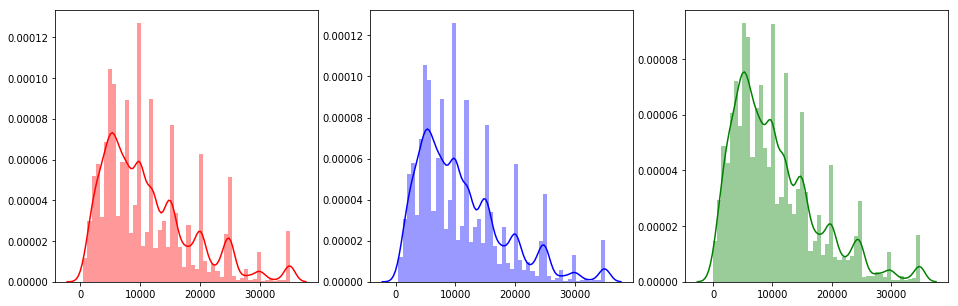

In [515]:
fig, sb_plt = plt.subplots(1, 3, figsize=(16,5))
loan_amount = loan_df['loan_amnt'].values
funded_amount = loan_df['funded_amnt'].values
funded_amount_by_investors = loan_df['funded_amnt_inv'].values
sns.distplot(loan_amount, ax=sb_plt[0], color='r')
sns.distplot(funded_amount, ax=sb_plt[1], color='b')
sns.distplot(funded_amount_by_investors, ax=sb_plt[2], color='g')

In [516]:
loan_df.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'loan_issue_year'],
      dtype='object')

In [517]:
# Fully paid
# Charged off = defaulters
# Current - 
loan_df['loan_status']
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

([<matplotlib.patches.Wedge at 0x1ecc3959710>,
 [Text(-1.41922,0.841615,'Fully Paid'),
  Text(1.54034,-1.11236,'Charged Off'),
  Text(1.6433,-0.148584,'Current')])

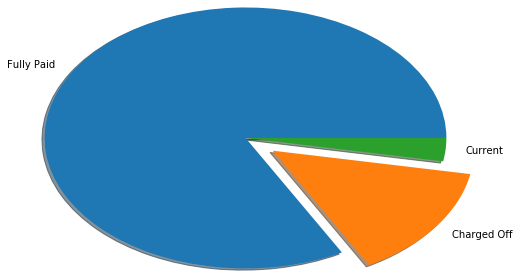

In [518]:
plt.pie(loan_df['loan_status'].value_counts(), 
        labels=['Fully Paid', 'Charged Off', 'Current'], shadow=True, explode=[0,0.25,0], radius=1.5)

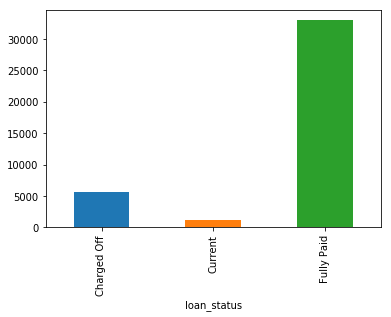

In [522]:
loan_df.groupby(by='loan_status').size().plot(kind='bar')

### Since we are only interested in driving factors of the loans that would be defaulted, we would be dropping the rows with loan status 'Fully Paid' and 'Current'

In [523]:
loan_df.drop(loan_df[loan_df['loan_status'] != 'Charged Off'].index, inplace=True)

In [524]:
sum(loan_df['loan_status'] == 'Charged Off')

5627

In [525]:
# Reset the index of rows
loan_df.reset_index(inplace=True)

In [526]:
#charged off loans by year
charged_off_loan_by_year = loan_df.groupby('loan_issue_year')
temp = charged_off_loan_by_year['loan_status'].value_counts()
#charged_off_loan_by_year['']

### Q. How many loans were defaulted by year

Text(0,0.5,"'Charged Off' Loan count ")

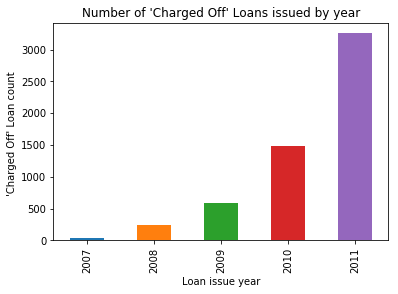

In [527]:
grouped_by_year = loan_df.groupby(loan_df['loan_issue_year'])
grouped_by_year.size().plot(kind='bar')
plt.title("Number of \'Charged Off\' Loans issued by year")
plt.xlabel('Loan issue year')
plt.ylabel('\'Charged Off\' Loan count ')

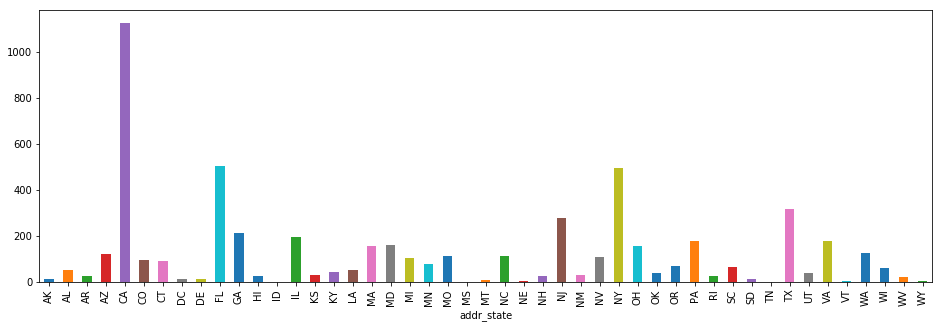

In [528]:
# charged off loans by state
# temp['count'] = loan_charged_off_plt.groupby(loan_charged_off_plt['addr_state']).size()
# temp['state'] = loan_charged_off_plt.groupby(loan_charged_off_plt['addr_state']).size().index
# plt.subplots(1, 1, figsize=(16,5))
# sns.barplot(x='state', y='count', data=temp)
plt.subplots(1, 1, figsize=(16,5))
loan_df.groupby(loan_df['addr_state']).size().plot(kind='bar')

In [529]:
loan_df.shape

(5627, 53)

In [530]:
for column in loan_df.columns:
    percentage_of_missing_rows = sum(loan_df[column].isna())/5627 * 100
    print(percentage_of_missing_rows)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.051892660387417
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
61.933534743202415
89.72809667673715
0.0
0.0
0.0
0.28434334458859073
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.2617735916118713
0.0
100.0
0.01777145903678692
0.10662875422072153
0.0
0.0
0.0
0.10662875422072153
0.0
2.097032166340856
0.01777145903678692
0.0


In [531]:
loan_df.dropna(axis=1, how='all', inplace=True)

In [532]:
for column in loan_df.columns:
    percentage_of_missing_rows = sum(loan_df[column].isna())/5627 * 100
    if(percentage_of_missing_rows > 50):
        print(column)

mths_since_last_delinq
mths_since_last_record


### Q. Are there any members who have taken loans more than once

In [533]:
loan_df.duplicated().sum()

0

> ##### None of the members have taken loans more than once

### Q. Did all of the members had their income verified by LC or if the income source was verified

In [534]:
# lets check if there are any missing values in this column
loan_df['verification_status'].isna().sum()

0

In [535]:
#Lets check the verification_status available
loan_df.groupby(by='verification_status').size()

verification_status
Not Verified       2142
Source Verified    1434
Verified           2051
dtype: int64

**The 'verification_status' of loans can be 'Not Verified', 'Source Verified' and 'Verified'**

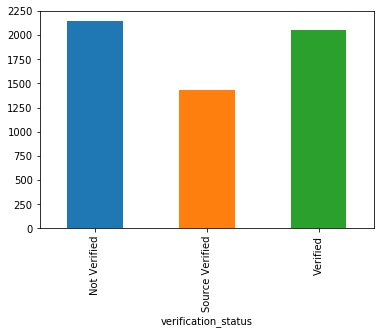

In [536]:
#Lets plot it in a graph 
loan_df.groupby(by='verification_status').size().plot(kind='bar')

In [537]:
loan_df['term']

0        60 months
1        60 months
2        60 months
3        36 months
4        36 months
5        36 months
6        36 months
7        36 months
8        60 months
9        36 months
10       36 months
11       36 months
12       60 months
13       60 months
14       60 months
15       60 months
16       36 months
17       60 months
18       36 months
19       60 months
20       36 months
21       60 months
22       36 months
23       60 months
24       36 months
25       36 months
26       36 months
27       36 months
28       60 months
29       36 months
           ...    
5597     36 months
5598     36 months
5599     36 months
5600     36 months
5601     36 months
5602     36 months
5603     36 months
5604     36 months
5605     36 months
5606     36 months
5607     36 months
5608     36 months
5609     36 months
5610     36 months
5611     36 months
5612     36 months
5613     36 months
5614     36 months
5615     36 months
5616     36 months
5617     36 months
5618     36 

### Q. The Charged off loan borrowers term information

In [538]:
loan_df.groupby(by='term').size()

term
 36 months    3227
 60 months    2400
dtype: int64

> ** Most of the loan borrowers have taken loan for either 36 months or 60 months**

## Q. What is emp_length of the borrowers who are Charged Off

In [539]:
loan_df.groupby(by='emp_length').size()

emp_length
1 year        456
10+ years    1331
2 years       567
3 years       555
4 years       462
5 years       458
6 years       307
7 years       263
8 years       203
9 years       158
< 1 year      639
dtype: int64

## Home ownership details

In [540]:
loan_df.groupby(by='home_ownership').size()

home_ownership
MORTGAGE    2327
OTHER         18
OWN          443
RENT        2839
dtype: int64

> ** Looks like most of the borrowers are either on mortgage or on rent**

## Annual increment details of the borrowers

In [541]:
loan_df['annual_inc']

0        30000.0
1        40000.0
2        15000.0
3        30000.0
4       100000.0
5       105000.0
6        76000.0
7        60000.0
8        50004.0
9       100000.0
10       80000.0
11       50000.0
12       50000.0
13       45996.0
14       30000.0
15       75000.0
16       75000.0
17       45000.0
18       25000.0
19       38000.0
20       75000.0
21       67000.0
22       45000.0
23       52000.0
24       90000.0
25       41000.0
26       42000.0
27       60000.0
28       25000.0
29       85000.0
          ...   
5597     44000.0
5598     40000.0
5599     44400.0
5600     12000.0
5601    616000.0
5602     51000.0
5603    275000.0
5604    120000.0
5605    109000.0
5606     75000.0
5607     85000.0
5608     60000.0
5609     35000.0
5610     39000.0
5611     29120.0
5612     12500.0
5613     10000.0
5614     45600.0
5615     39000.0
5616     62200.0
5617     70000.0
5618     96000.0
5619     15000.0
5620     96000.0
5621     40000.0
5622     32000.0
5623     75000.0
5624    213000

In [544]:
## TODO : annual_inc
loan_df['annual_inc']
sns.boxplot


0

In [547]:
loan_df['purpose'].isna().any()

False

## Q. Why did most of the borrowers took the money for

In [546]:
loan_df.groupby(by='purpose').size()

purpose
car                    160
credit_card            542
debt_consolidation    2767
educational             56
home_improvement       347
house                   59
major_purchase         222
medical                106
moving                  92
other                  633
renewable_energy        19
small_business         475
vacation                53
wedding                 96
dtype: int64

## Q. What is the DTI Debt-To-Income Ratio - DTI of borrowers

In [549]:
loan_df['dti'].describe()

count    5627.000000
mean       14.000624
std         6.585577
min         0.000000
25%         9.050000
50%        14.290000
75%        19.290000
max        29.850000
Name: dti, dtype: float64

In [555]:
loan_df.groupby(by='delinq_2yrs').size()

delinq_2yrs
0    4936
1     507
2     130
3      35
4      13
5       3
6       1
7       1
8       1
dtype: int64

In [569]:
# earliest_cr_line https://www.investopedia.com/terms/l/lineofcredit.asp
loan_df['earliest_cr_line']
temp = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y').dt.year
temp.groupby(temp).size()

earliest_cr_line
1969      3
1970      7
1971      5
1972      8
1973     12
1974      6
1975      9
1976      4
1977     13
1978     23
1979     31
1980     16
1981     20
1982     32
1983     53
1984     49
1985     66
1986     53
1987     77
1988    106
1989    112
1990    125
1991    143
1992    135
1993    195
1994    275
1995    303
1996    299
1997    374
1998    415
1999    442
2000    500
2001    356
2002    255
2003    225
2004    229
2005    239
2006    224
2007    144
2008     28
2062      2
2063      1
2065      1
2066      2
2067      5
2068      5
Name: earliest_cr_line, dtype: int64

In [570]:
## open_acc
loan_df['open_acc']

0        3
1       11
2        2
3        4
4       14
5        7
6        7
7        7
8       14
9       17
10       9
11      11
12       7
13       7
14       7
15       6
16       9
17      13
18       7
19       6
20       9
21       6
22      12
23      10
24       9
25       8
26       8
27       8
28       7
29       8
        ..
5597     4
5598     5
5599    15
5600     4
5601    12
5602     8
5603     4
5604    27
5605     6
5606    14
5607    15
5608     9
5609     7
5610     6
5611     3
5612     3
5613     5
5614     3
5615     9
5616     8
5617    15
5618     5
5619    16
5620     4
5621    13
5622    11
5623     9
5624    11
5625     9
5626    17
Name: open_acc, Length: 5627, dtype: int64

In [577]:
# pub_rec very important
sum(loan_df['pub_rec'] == 2)

10

In [592]:
#The number of accounts on which the borrower is now delinquent.
sum(loan_df['acc_now_delinq'] ==0)

5627

In [595]:
#chargeoff_within_12_mths : Number of charge-offs within 12 months
loan_df['chargeoff_within_12_mths'] >=1

0

In [598]:
#The past-due amount owed for the accounts on which the borrower is now delinquent.
sum(loan_df['delinq_amnt'] == 0)

5627

In [602]:
#Number of public record bankruptcies
(loan_df['pub_rec_bankruptcies'] >= 1).sum()

368

In [610]:
#Tax lein https://www.forbes.com/sites/jaredhecht/2018/08/29/what-is-a-tax-lien-and-how-does-it-affect-your-financing-options/#207e2f31687d
loan_df['tax_liens'].fillna(value=0.0, inplace=True)
sum(loan_df['tax_liens'] == 0.0)

5627